In [72]:
import pandas as pd
import numpy as np

In [73]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [74]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [75]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [76]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [77]:
268/500

0.536

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

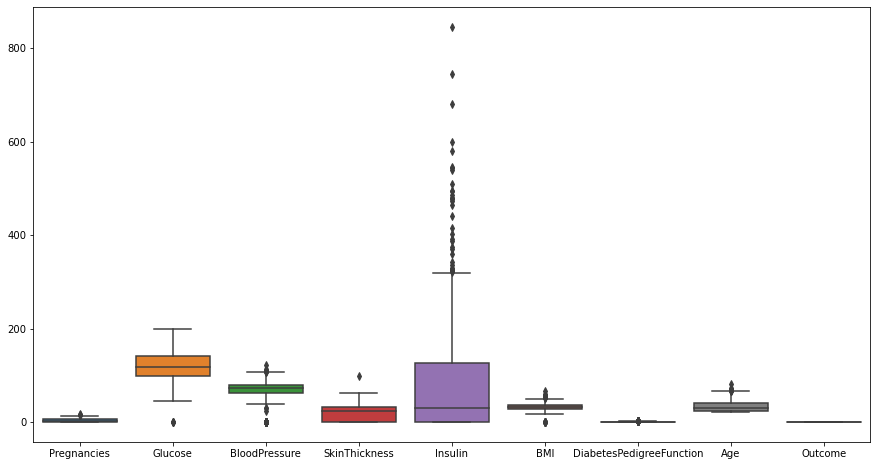

In [79]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df)
plt.show()

In [101]:
X = df3.drop('Outcome', axis=1)
y = df3.Outcome

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
scalar = StandardScaler()
X_scalar = scalar.fit_transform(X)
X_scalar[0]

array([ 0.65425001,  1.46491302,  0.03183442,  0.96783208, -0.84398178,
        0.30604709,  0.56864539,  1.48308534])

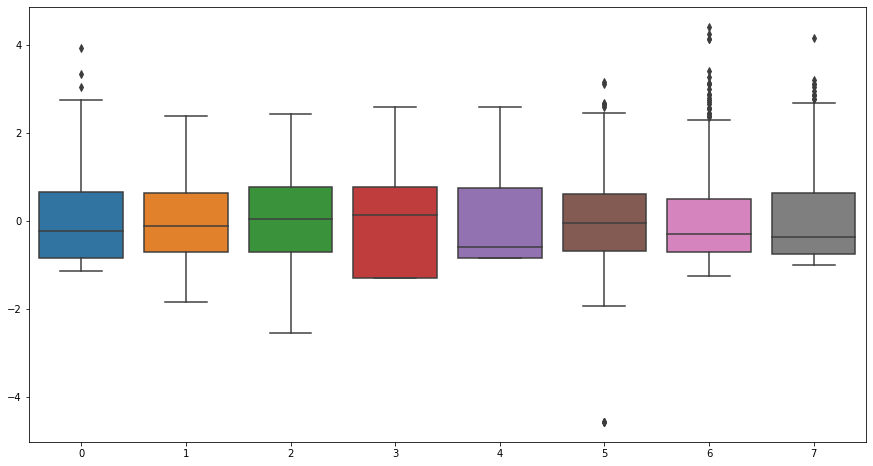

In [112]:
plt.figure(figsize=(15,8))
sns.boxplot(data=X_scalar)
plt.show()

In [113]:
from sklearn.model_selection import train_test_split

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [123]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

scores = cross_val_score(DecisionTreeClassifier(), X,y, cv=5)
scores

array([0.7008547 , 0.72649573, 0.62068966, 0.75      , 0.63793103])

In [124]:
scores.mean()

0.6871942234011199

In [126]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

scores_scaled = cross_val_score(DecisionTreeClassifier(), X_scalar,y, cv=5)
scores_scaled

array([0.68376068, 0.69230769, 0.64655172, 0.75      , 0.6637931 ])

In [127]:
scores_scaled.mean()

0.6872826407309166

In [128]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
            base_estimator=DecisionTreeClassifier(),
            n_estimators=100,
            max_samples=0.7,
            oob_score=True,
            random_state=0)

bag_model.fit(X_train,y_train)
bag_model.score(X_test,y_test)

0.76

In [129]:
bag_model.oob_score_

0.7469287469287469

In [131]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
            base_estimator=DecisionTreeClassifier(),
            n_estimators=100,
            max_samples=0.7,
            oob_score=True,
            random_state=0)

score = cross_val_score(bag_model, X,y, cv=5)
score

array([0.7008547 , 0.76068376, 0.74137931, 0.79310345, 0.74137931])

In [132]:
score.mean()

0.7474801061007957

In [136]:
from sklearn.ensemble import RandomForestClassifier

score = cross_val_score(RandomForestClassifier(n_estimators=50), X, y, cv=5)
score.mean()

0.7422929560860596

### Remove outlier

In [80]:
df.BloodPressure.mean()

69.10546875

In [81]:
df.BloodPressure.std()

19.355807170644777

In [82]:
69.10546875+1.5*19.355807170644777

98.13917950596716

In [83]:
upper_limit = df['BloodPressure'].mean()+1.5*df['BloodPressure'].std()
upper_limit

98.13917950596716

In [84]:
lower_limit = df['BloodPressure'].mean()-1.5*df['BloodPressure'].std()
lower_limit

40.071757994032836

In [85]:
df1 = df[(df['BloodPressure']>lower_limit) & (df['BloodPressure'] < upper_limit)]
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [86]:
upper_limit = df1['Glucose'].mean()+1.5*df1['Glucose'].std()
upper_limit

169.01488402457375

In [87]:
lower_limit = df1['Glucose'].mean()-1.5*df1['Glucose'].std()
lower_limit

72.69298114396557

In [88]:
df2 = df1[(df1['Glucose']>lower_limit) & (df1['Glucose'] < upper_limit)]
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [89]:
upper_limit = df2['Insulin'].mean()+1.5*df2['Insulin'].std()
upper_limit

229.28995655179273

In [90]:
lower_limit = df2['Insulin'].mean()-1.5*df2['Insulin'].std()
lower_limit

-76.44331118438056

In [91]:
df3 = df2[(df2['Insulin']>lower_limit) & (df2['Insulin'] < upper_limit)]
df3

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


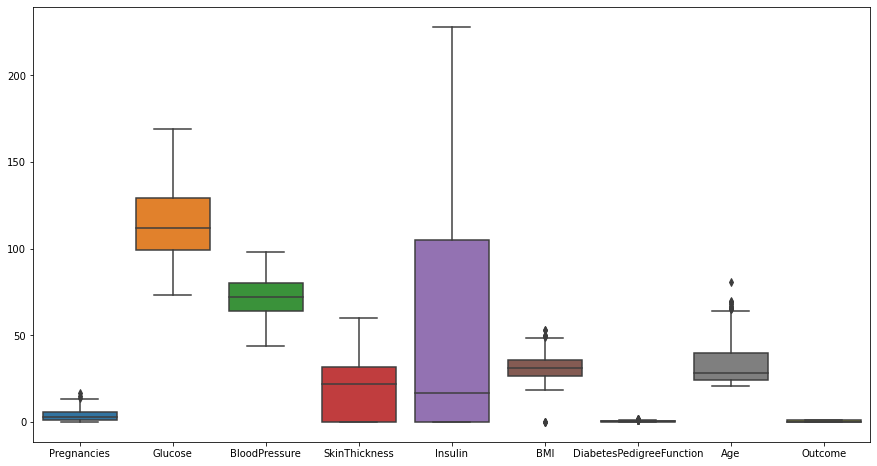

In [92]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df3)
plt.show()

In [94]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26


In [95]:
y.head()

0    1
1    0
3    0
5    0
6    1
Name: Outcome, dtype: int64

In [96]:
df3.shape

(582, 9)

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [139]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

scores = cross_val_score(DecisionTreeClassifier(), X,y, cv=5)
scores

array([0.69230769, 0.69230769, 0.62931034, 0.74137931, 0.69827586])

In [140]:
scores.mean()

0.6907161803713529

In [141]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
            base_estimator=DecisionTreeClassifier(),
            n_estimators=100,
            max_samples=0.7,
            oob_score=True,
            random_state=0)

bag_model.fit(X_train,y_train)
bag_model.score(X_test,y_test)

0.76

In [157]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
            base_estimator=DecisionTreeClassifier(),
            n_estimators=180,
            max_samples=0.7,
            oob_score=True,
            random_state=0)

score = cross_val_score(bag_model, X,y, cv=5)
score.mean()

0.750913645741232

In [158]:
from sklearn.ensemble import RandomForestClassifier

score = cross_val_score(RandomForestClassifier(n_estimators=50), X, y, cv=5)
score.mean()

0.7560418508694371